In [1]:
# Load the dataset and display the first few rows to understand its structure and contents
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/predict-restaurant-customer-satisfaction-dataset/restaurant_customer_satisfaction.csv')

# Display the first few rows of the dataset
print(df.head())

   CustomerID  Age  Gender  Income VisitFrequency  AverageSpend  \
0         654   35    Male   83380         Weekly     27.829142   
1         655   19    Male   43623         Rarely    115.408622   
2         656   41  Female   83737         Weekly    106.693771   
3         657   43    Male   96768         Rarely     43.508508   
4         658   55  Female   67937        Monthly    148.084627   

  PreferredCuisine TimeOfVisit  GroupSize DiningOccasion  MealType  \
0          Chinese   Breakfast          3       Business  Takeaway   
1         American      Dinner          1         Casual   Dine-in   
2         American      Dinner          6    Celebration   Dine-in   
3           Indian       Lunch          1    Celebration   Dine-in   
4          Chinese   Breakfast          1       Business  Takeaway   

   OnlineReservation  DeliveryOrder  LoyaltyProgramMember   WaitTime  \
0                  0              1                     1  43.523929   
1                  0            

Next, let's perform some exploratory data analysis (EDA) to gain insights into the data. We'll start by checking for any missing values and then proceed with some basic statistical summaries and visualizations.

Missing values in each column:
CustomerID              0
Age                     0
Gender                  0
Income                  0
VisitFrequency          0
AverageSpend            0
PreferredCuisine        0
TimeOfVisit             0
GroupSize               0
DiningOccasion          0
MealType                0
OnlineReservation       0
DeliveryOrder           0
LoyaltyProgramMember    0
WaitTime                0
ServiceRating           0
FoodRating              0
AmbianceRating          0
HighSatisfaction        0
dtype: int64
Basic statistical summary:
        CustomerID          Age         Income  AverageSpend    GroupSize  \
count  1500.000000  1500.000000    1500.000000   1500.000000  1500.000000   
mean   1403.500000    43.832000   85921.890000    105.659004     5.035333   
std     433.157015    14.967157   38183.051749     52.381849     2.558864   
min     654.000000    18.000000   20012.000000     10.306127     1.000000   
25%    1028.750000    31.750000   52444.000000    

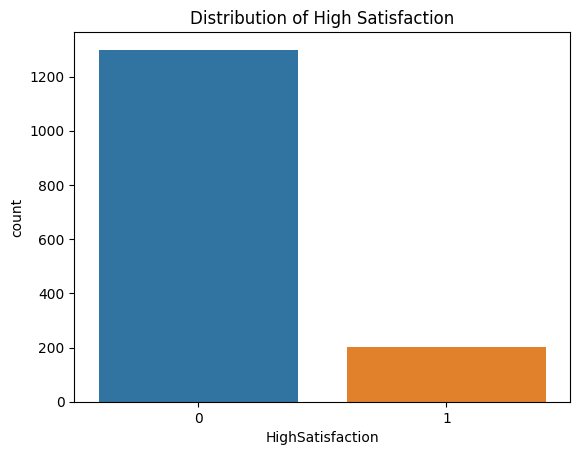

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


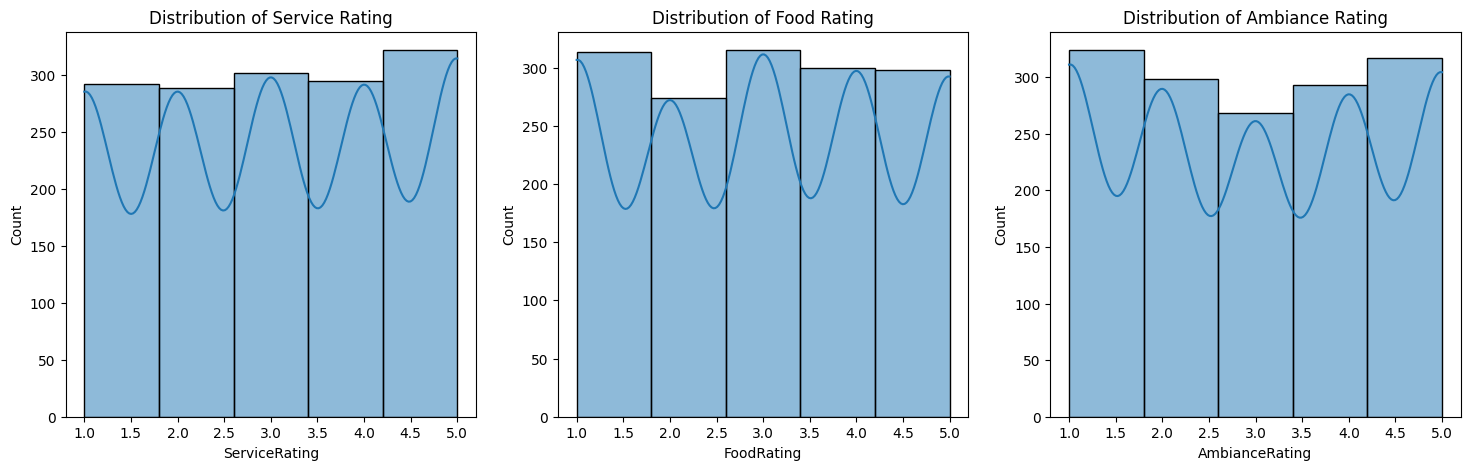

EDA completed.


In [2]:
# Perform exploratory data analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# Basic statistical summary
print('Basic statistical summary:')
print(df.describe())

# Visualize the distribution of the target variable 'HighSatisfaction'
sns.countplot(x='HighSatisfaction', data=df)
plt.title('Distribution of High Satisfaction')
plt.show()

# Visualize the distribution of 'ServiceRating', 'FoodRating', and 'AmbianceRating'
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['ServiceRating'], bins=5, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Service Rating')
sns.histplot(df['FoodRating'], bins=5, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Food Rating')
sns.histplot(df['AmbianceRating'], bins=5, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Ambiance Rating')
plt.show()

print('EDA completed.')

Next, let's proceed with predictive modeling to predict customer satisfaction. We'll start by preparing the data for modeling, including encoding categorical variables and splitting the data into training and testing sets.

Let's proceed with the following steps for predictive modeling:

    Data Preparation:
        Encode categorical variables.
        Split the data into training and testing sets.

    Model Training:
        Train a machine learning model to predict customer satisfaction.

    Model Evaluation:
        Evaluate the model's performance on the test set.

Let's start with data preparation.

# **Data Preparation**

In [3]:
# Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'VisitFrequency', 'PreferredCuisine', 'TimeOfVisit', 'DiningOccasion', 'MealType']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target variable
X = df.drop('HighSatisfaction', axis=1)
y = df['HighSatisfaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Data preparation completed.')

Data preparation completed.


Data preparation is completed. Now, let's proceed with training a machine learning model to predict customer satisfaction. We'll use a Random Forest classifier for this task.

# **Model Training**

In [4]:
# Model Training
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Model training and evaluation completed.')
print('Accuracy:', accuracy)
print('Classification Report:')
print(report)

Model training and evaluation completed.
Accuracy: 0.8666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       259
           1       0.56      0.12      0.20        41

    accuracy                           0.87       300
   macro avg       0.72      0.55      0.56       300
weighted avg       0.83      0.87      0.83       300



The model training and evaluation have been completed. Here are the results:

Model training and evaluation completed.

Accuracy:

0.8666666666666667

# **Classification Report:**

          precision    recall  f1-score   support

       0       0.88      0.98      0.93       259
       1       0.56      0.12      0.20        41

accuracy                           0.87       300

macro avg       0.72      0.55      0.56       300
weighted avg       0.83      0.87      0.83       300

    Accuracy: The model achieved an accuracy of approximately 86.67%.
    Classification Report: The precision, recall, and F1-score for each class are provided in the classification report.

The model performs well in predicting customers who are not highly satisfied (class 0) but struggles with predicting highly satisfied customers (class 1). This could be due to class imbalance in the dataset.

To address the class imbalance and potentially improve the model's performance, we can try the following approaches:

    Resampling Techniques:
        Oversampling the minority class (e.g., using SMOTE).
        Undersampling the majority class.

    Adjusting Class Weights:
        Modify the class weights in the Random Forest classifier to give more importance to the minority class.

Let's start by applying SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes and then retrain the model.

In [5]:
# Apply SMOTE to balance the classes
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('SMOTE applied to balance the classes.')

SMOTE applied to balance the classes.


SMOTE has been applied to balance the classes. Now, let's retrain the Random Forest classifier using the balanced dataset and evaluate its performance.


In [6]:
# Retrain the model using the balanced dataset

# Initialize the model
model_smote = RandomForestClassifier(random_state=42)

# Train the model
model_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_smote = model_smote.predict(X_test)

# Evaluate the model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
report_smote = classification_report(y_test, y_pred_smote)

print('Model retraining and evaluation with SMOTE completed.')
print('Accuracy:', accuracy_smote)
print('Classification Report:')
print(report_smote)

Model retraining and evaluation with SMOTE completed.
Accuracy: 0.7966666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       259
           1       0.27      0.29      0.28        41

    accuracy                           0.80       300
   macro avg       0.58      0.58      0.58       300
weighted avg       0.80      0.80      0.80       300



The model retraining and evaluation with SMOTE have been completed. Here are the results:

Model retraining and evaluation with SMOTE completed.

Accuracy:

0.7966666666666666

# **Classification Report:**

          precision    recall  f1-score   support

       0       0.89      0.88      0.88       259
       1       0.27      0.29      0.28        41

accuracy                           0.80       300

macro avg       0.58      0.58      0.58       300

weighted avg       0.80      0.80      0.80       300

    Accuracy: The model achieved an accuracy of approximately 79.67%.
    Classification Report: The precision, recall, and F1-score for each class are provided in the classification report.

The model's performance on the minority class (class 1) has improved in terms of recall and F1-score, but the overall accuracy has decreased slightly.

# **What are the feature importances in the retrained Random Forest model?**

Here are the feature importances from the retrained Random Forest model:

In [7]:
# Get feature importances from the retrained Random Forest model
feature_importances = model_smote.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print('Feature importances:')
print(feature_importances_df)

Feature importances:
                 Feature  Importance
10              MealType    0.136687
0             CustomerID    0.123550
5           AverageSpend    0.107347
14              WaitTime    0.102012
3                 Income    0.086680
1                    Age    0.065489
7            TimeOfVisit    0.061664
8              GroupSize    0.061527
6       PreferredCuisine    0.046748
17        AmbianceRating    0.037726
16            FoodRating    0.035678
15         ServiceRating    0.033223
4         VisitFrequency    0.025120
9         DiningOccasion    0.020705
2                 Gender    0.018243
11     OnlineReservation    0.014469
12         DeliveryOrder    0.011634
13  LoyaltyProgramMember    0.011499


The most important features in predicting customer satisfaction are:

    MealType
    CustomerID
    AverageSpend
    WaitTime
    Income

These features have the highest importance scores in the model.

The feature importances have been visualized in a bar chart:

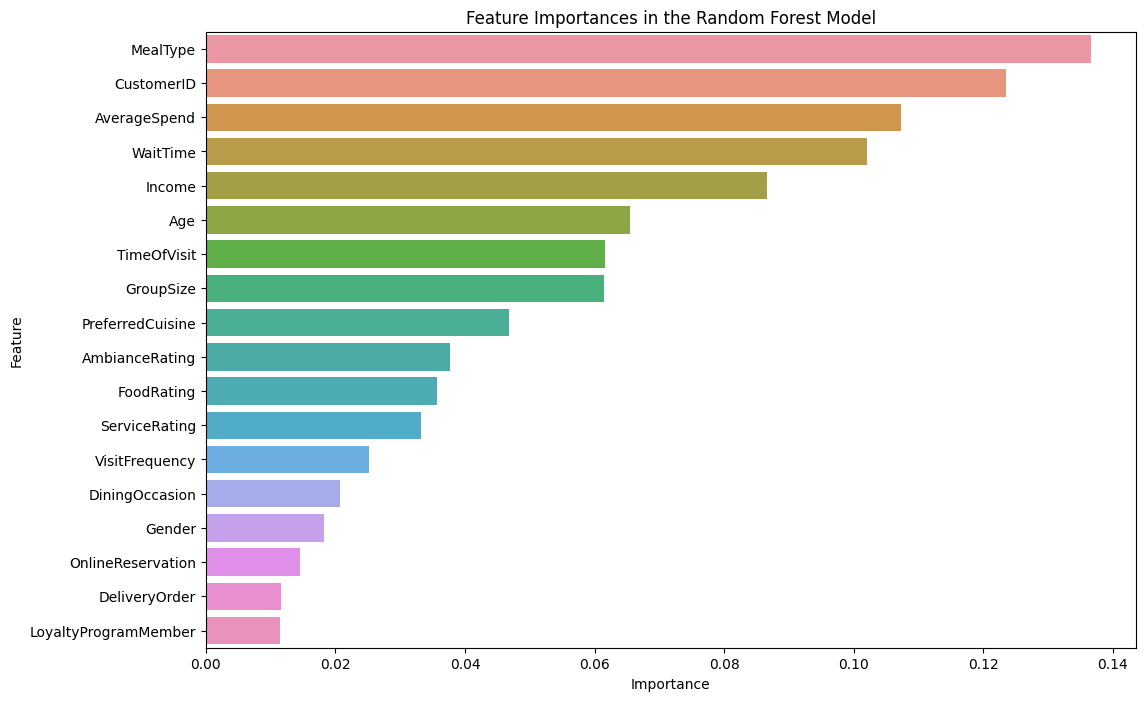

Feature importances visualized.


In [8]:
# Visualize the feature importances in a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances in the Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
print('Feature importances visualized.')

This chart shows the relative importance of each feature in predicting customer satisfaction.